# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load the data
os.chdir('../data/cleaned')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(3)

,id,date,country,store,product,num_sold,is_available,imputation_method,day_of_week,month,year,is_weekend
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0.0,0,systemic_zero,4,1,2010,0
1,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,0.0,0,no_imputation,5,1,2010,1
2,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,0.0,0,no_imputation,6,1,2010,1


## Sanity Checks

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 230130 non-null  int64  
 1   date               230130 non-null  object 
 2   country            230130 non-null  object 
 3   store              230130 non-null  object 
 4   product            230130 non-null  object 
 5   num_sold           230130 non-null  float64
 6   is_available       230130 non-null  int64  
 7   imputation_method  230130 non-null  object 
 8   day_of_week        230130 non-null  int64  
 9   month              230130 non-null  int64  
 10  year               230130 non-null  int64  
 11  is_weekend         230130 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 21.1+ MB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            98550 non-null  int64 
 1   date          98550 non-null  object
 2   country       98550 non-null  object
 3   store         98550 non-null  object
 4   product       98550 non-null  object
 5   day_of_week   98550 non-null  int64 
 6   month         98550 non-null  int64 
 7   year          98550 non-null  int64 
 8   is_weekend    98550 non-null  int64 
 9   is_available  98550 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 7.5+ MB


In [4]:
train['num_sold'] = train['num_sold'].astype('int64')

In [5]:
# from now on we will change the train to df
df = train.copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

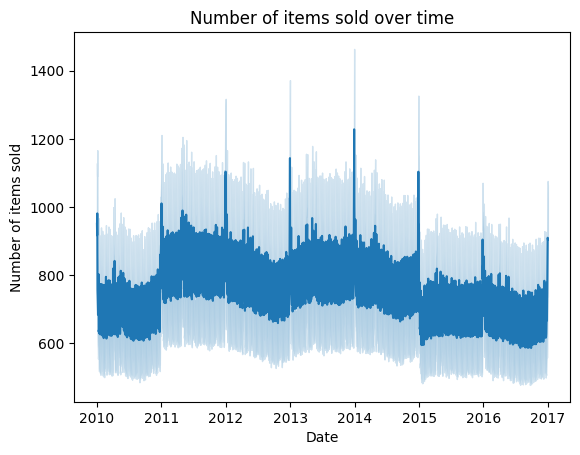

In [7]:
sns.lineplot(df['num_sold'])
plt.title('Number of items sold over time')
plt.xlabel('Date')
plt.ylabel('Number of items sold')
plt.show()

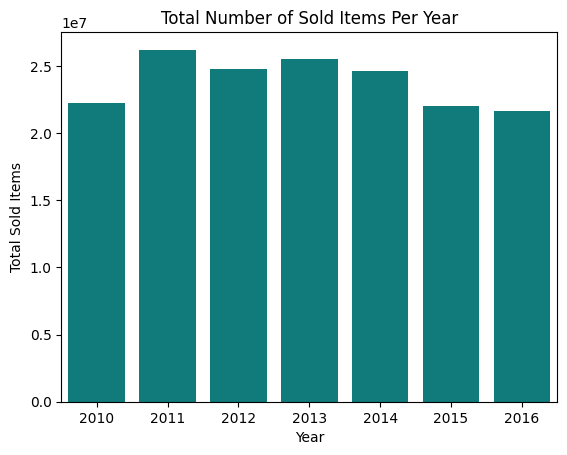

In [17]:
# Group by year and calculate the total number of sold items per year
yearly_sales = df.groupby('year')['num_sold'].sum().reset_index()

# Create a line plot
sns.barplot(x= 'year', y='num_sold', data=yearly_sales, color='darkcyan')

# Add title and labels
plt.title("Total Number of Sold Items Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sold Items")

# Show the plot
plt.show()

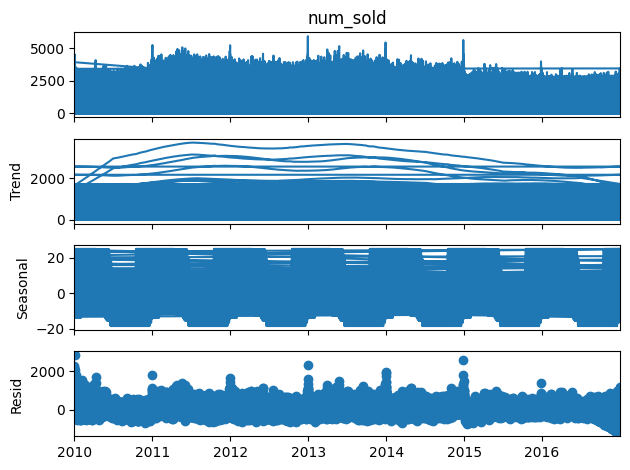

In [24]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(
    df['num_sold'], 
    model='additive', 
    period=365
    )  # Adjust period as needed
decomposition.plot()
plt.show()

Check for seasonality

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['num_sold'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -6.336318644713077
p-value: 2.8249289273134016e-08
Critical Values: {'1%': np.float64(-3.430378426494685), '5%': np.float64(-2.8615525641435626), '10%': np.float64(-2.56677668744033)}


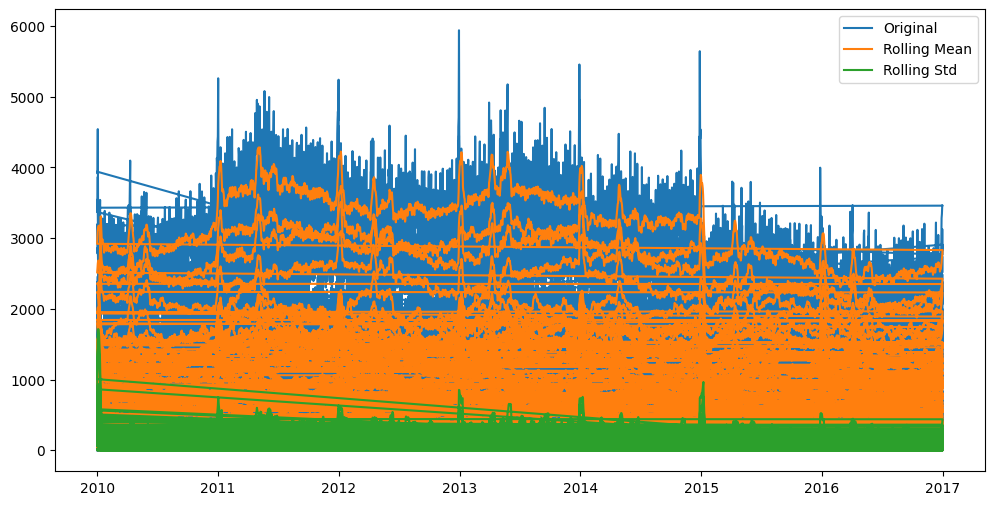

In [27]:
rolling_mean = df['num_sold'].rolling(window=12).mean()
rolling_std = df['num_sold'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['num_sold'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()